# Data Visualization & Tidying Lab

This notebook is split into **two parts**:

1. **Core skills tutorial** – short walkthroughs that demonstrate standard Python data-visualization techniques with `matplotlib`, `seaborn`, and `pandas`.  
2. **Applied challenges** – five messy, simulated data sets accompanied by stakeholder-style questions that someone might ask you to answer. Your task is to tidy each data set and write a brief data story for your audience with visuals.



## Part 1 – Core Visualization Skills 

### 1. Line, scatter, bar – the classics

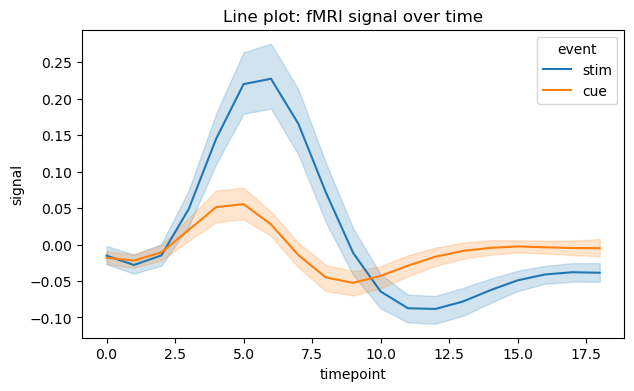

In [1]:
import seaborn as sns, matplotlib.pyplot as plt, pandas as pd

# Load example
fmri = sns.load_dataset('fmri')

# LINE PLOT — average signal over time for each event type
plt.figure(figsize=(7,4))
sns.lineplot(data=fmri, x='timepoint', y='signal', hue='event') 
plt.title('Line plot: fMRI signal over time')
plt.show()



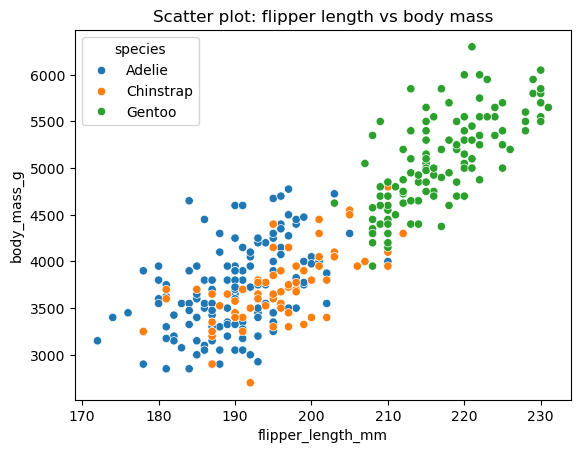

In [2]:
# SCATTER PLOT — flipper vs body mass
penguins = sns.load_dataset('penguins').dropna()
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.title('Scatter plot: flipper length vs body mass')
plt.show()



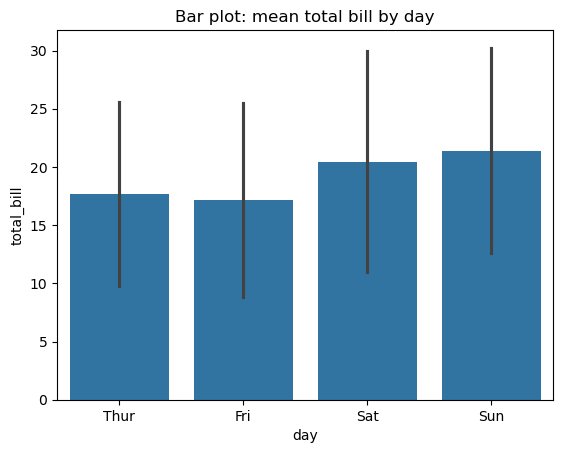

In [3]:
# BAR PLOT — mean total bill by day
tips = sns.load_dataset('tips')
sns.barplot(data=tips, x='day', y='total_bill', errorbar='sd')
plt.title('Bar plot: mean total bill by day')
plt.show()

These three basic plotting examples cover **quantitative over time**, **relationship between two numeric variables**, and **comparisons across categories**. Remember to always label axes and provide context in titles or captions.

### 2. Distributions – histograms, KDEs, box/violin

Use **histograms/KDEs** for a single distribution and **box/violin** plots for comparing distributions across groups.

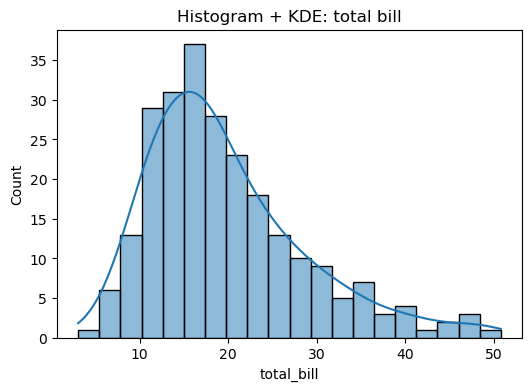

In [4]:
# Histogram + KDE overlay for 'total_bill'
plt.figure(figsize=(6,4))
sns.histplot(tips['total_bill'], kde=True, bins=20)
plt.title('Histogram + KDE: total bill')
plt.show()


#### What is a KDE and why would you ever want one? 

KDE - Kernal Density Estimation

They could be really useful when estimating discrete distributions as continuous ones so you can apply calculus to find probabilities

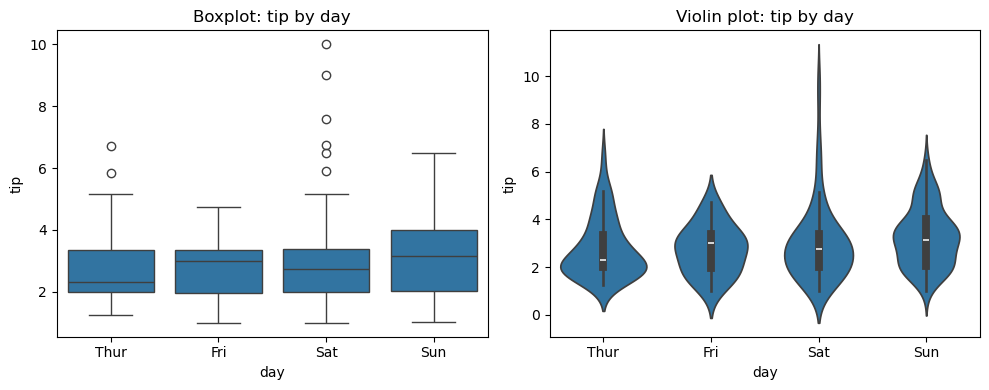

In [6]:
# Box & violin plots side-by-side
fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.boxplot(data=tips, x='day', y='tip', ax=ax[0])
ax[0].set_title('Boxplot: tip by day')
sns.violinplot(data=tips, x='day', y='tip', ax=ax[1])
ax[1].set_title('Violin plot: tip by day')
plt.tight_layout()
plt.show()

#### Why would you want to use a boxplot over a violin plot and vice versa?

Boxplots are way more visually simple to look at and is clearer to provide key statistics, but boxplots do not clearly show the true distribution like a violin plot does

### 3. Multi-dimensional encodings – color, size & facets

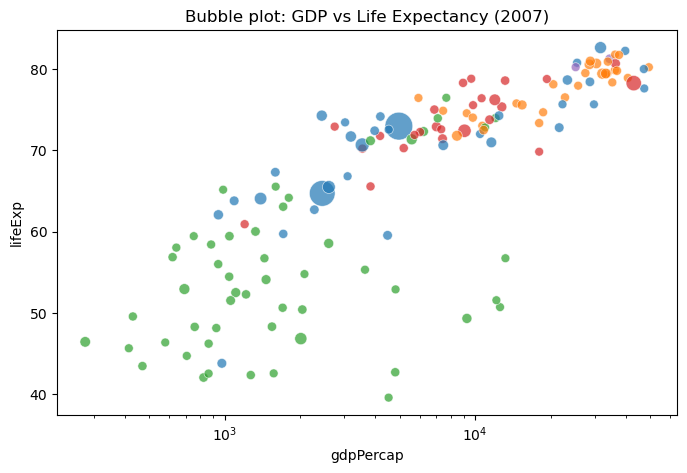

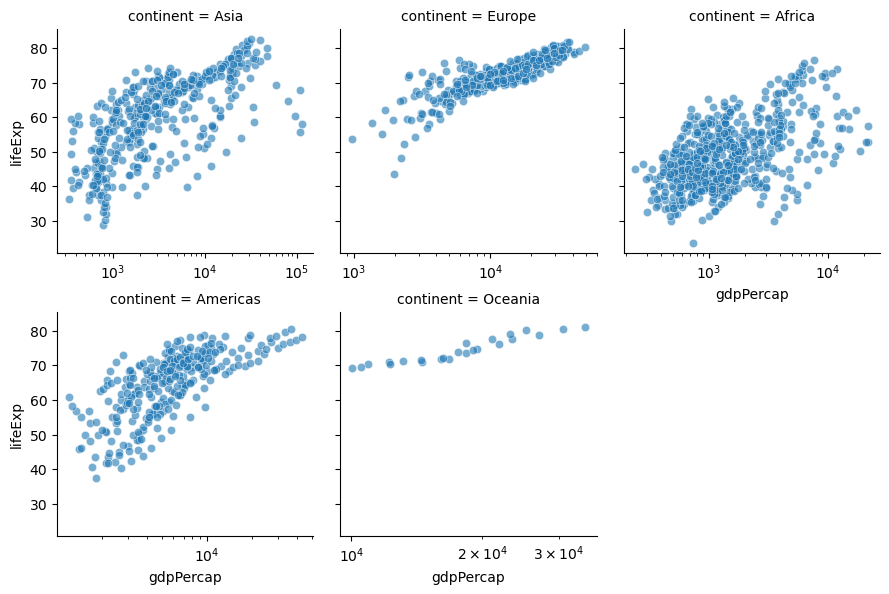

In [7]:
# Bubble plot: GDP vs life expectancy, bubble size = population
gap_url = 'https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv'
gap = pd.read_csv(gap_url)
year2007 = gap[gap.year == 2007]

plt.figure(figsize=(8,5))
sns.scatterplot(data=year2007, x='gdpPercap', y='lifeExp',
                size='pop', hue='continent', sizes=(40,400), alpha=0.7, legend=False)
plt.xscale('log')
plt.title('Bubble plot: GDP vs Life Expectancy (2007)')
plt.show()

# Facet grid
g = sns.relplot(data=gap, x='gdpPercap', y='lifeExp',
                col='continent', col_wrap=3,
                kind='scatter', height=3, alpha=0.6, facet_kws={'sharex':False})
g.set(xscale='log')

color, point size, and faceting let you incorporate **additional variables** without clutter.

### 4. Time series & multiple lines

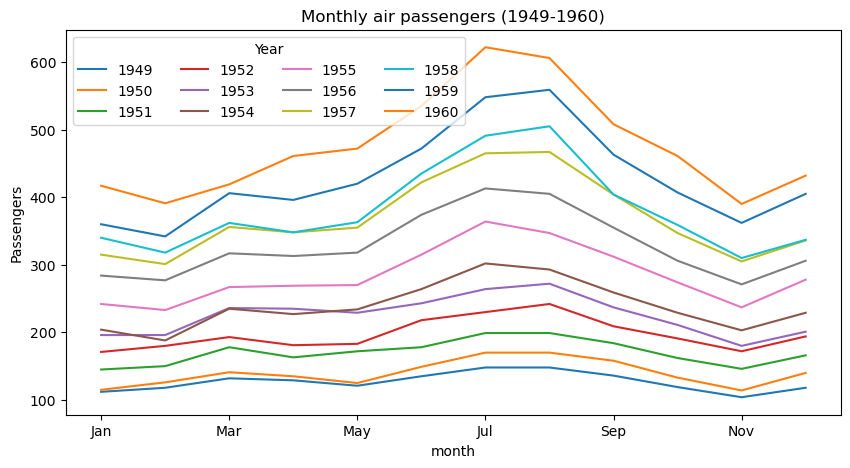

In [8]:
# Flights example
flights = sns.load_dataset('flights')
pivot = flights.pivot(index='month', columns='year', values='passengers')

pivot.plot(figsize=(10,5))
plt.title('Monthly air passengers (1949-1960)')
plt.ylabel('Passengers')
plt.legend(loc='upper left', ncol=4, title='Year')
plt.show()

Pivoting long-format data wide can make multi-line time-series plots straightforward.

### 5. Customising aesthetics

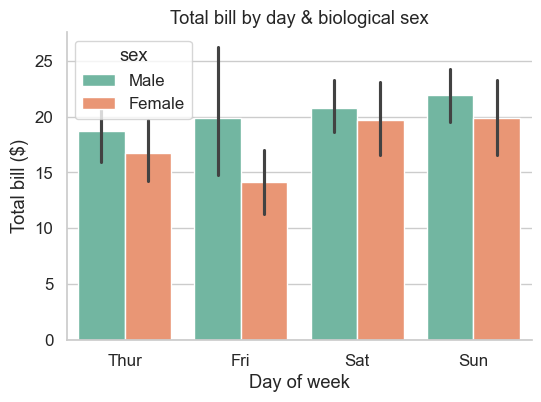

In [9]:
# Global Seaborn style
sns.set_theme(style='whitegrid', context='notebook', font_scale=1.1)

plt.figure(figsize=(6,4))
sns.barplot(data=tips, x='day', y='total_bill', hue='sex', palette='Set2')
plt.title('Total bill by day & biological sex')
plt.xlabel('Day of week')
plt.ylabel('Total bill ($)')
sns.despine()
plt.show()

Small touches (despine, style, context, custom palettes) go a long way to professional-looking figures.

## Part 2 – Applied Challenges

Below are five *realistic* messy data sets.  
For **each**:

1. **Run** the *Generate the data* cell to create a DataFrame `df`.  
2. Inspect & **tidy** it into a clean, analysis-ready form (remember *Tidy ≡ one variable per column, one observation per row*).  
3. **Answer the questions** in a concise written report (use the provided headings).  
4. Support your conclusions with **at least two visualizations** (feel free to create more).

### Report template (copy for each dataset)
- **Context** – restate the stakeholder’s objective in 1-2 sentences.  
- **Tidying steps** – bullet list of wrangling operations applied.  
- **Findings** – describe what the visuals show.  
- **Recommendations** – actionable insights for the stakeholder.


### Challenge 1: Global Gadget Co. sales data (messy wide)

*Stakeholder*: **VP of Sales**  
> “We need to understand how each product sold across regions over the year and spot any patterns.”

**Key questions**
1. Which region and month generated the highest revenue for *Gizmo*?
2. Do *Widget* and *Doohickey* follow similar patterns over the year?

### Challenge 2: IoT greenhouse sensor logs

*Stakeholder*: **Facility engineer**  
> “Our sensors embed temperature and humidity in one field. I suspect humidity spikes at night – can you confirm?”

**Key questions**
1. At what hours does humidity exceed 60 % most frequently?
2. Is there any correlation between temperature and humidity?

### Challenge 3: Developer tools preference survey

*Stakeholder*: **Product manager**  
> “We surveyed devs about their favorite tools. Can you tell if age group influences tool choice and satisfaction?”

**Key questions**
1. Which tools are most popular in the 18-24 vs 45+ brackets?
2. Does reported satisfaction differ by primary tool?

### Challenge 4: Blood pressure drug trial

*Stakeholder*: **Principal Investigator**  
> “We ran a cross-over trial with three conditions. Summarise efficacy in reducing BP and highlight best performer.”

**Key questions**
1. What is the average BP reduction (post-minus-pre) for each drug?
2. Is there any individual variability?

### Challenge 5: Social media campaign analytics

*Stakeholder*: **Marketing lead**  
> “Our views are recorded as strings like ‘1.2k’. Clean this up and evaluate platform performance.”

**Key questions**
1. Which platform achieved the highest median daily *views* and *like rate*?
2. Are weekends different from weekdays?

### Challenge 1: Global Gadget Co. sales data (messy wide)

*Stakeholder*: **VP of Sales**  
> “We need to understand how each product sold across regions over the year and spot any seasonality.”

**Key questions**
1. Which region and month generated the highest revenue for *Gizmo*?
2. Do *Widget* and *Doohickey* follow similar seasonal patterns?

In [63]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():

    np.random.seed(0)
    months = list(range(1,13))
    regions = ['North', 'South', 'East', 'West']
    data = {}
    for r in regions:
        for m in months:
            col = f"{r[:2]}_{m}"
            data[col] = np.random.poisson(lam=2000 + 100*m + 400*regions.index(r), size=3)
    df = pd.DataFrame(data)
    df['Product'] = ['Gizmo', 'Widget', 'Doohickey']
    df = df.sample(frac=1, axis=1).reset_index(drop=True)
    return df


df = _simulate()
print("Shape:", df.shape)
df.head()

Shape: (3, 49)


,Ea_4,Ea_6,So_9,We_7,No_6,We_5,No_12,We_6,We_1,So_5,...,No_1,No_9,Ea_5,We_2,So_10,No_8,So_8,No_10,Ea_7,We_8
0,3183,3431,3289,3998,2708,3673,3170,3864,3389,2954,...,2106,2895,3181,3354,3331,2810,3212,2947,3469,3919
1,3241,3406,3356,3870,2579,3699,3089,3802,3308,2974,...,2113,2839,3268,3429,3335,2752,3225,3057,3515,4043
2,3152,3428,3213,3883,2630,3677,3211,3705,3454,2974,...,2090,2924,3280,3362,3322,2823,3284,3061,3522,4053


#### Your analysis below

Max Region: We, Month: 12


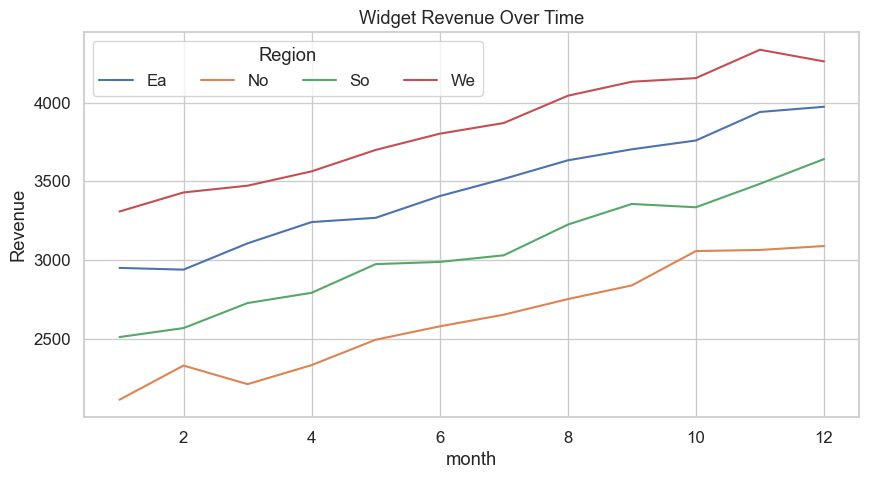

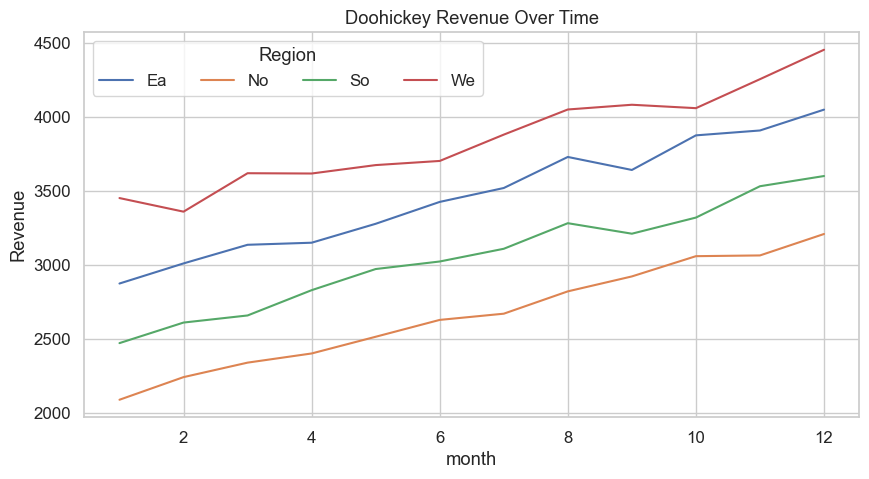

     Product region_num  revenue region  month
0      Gizmo       Ea_4     3183     Ea      4
1     Widget       Ea_4     3241     Ea      4
2  Doohickey       Ea_4     3152     Ea      4
3      Gizmo       Ea_6     3431     Ea      6
4     Widget       Ea_6     3406     Ea      6


In [64]:
# TODO: tidy the data, visualize, and answer questions
df_melted = df.melt(id_vars='Product', var_name='region_num', value_name='revenue')

df_melted = df_melted.dropna()

df_melted[['region', 'month']] = df_melted['region_num'].str.split('_', expand=True)

df_melted['month'] = df_melted['month'].astype(int)

df_gizmo = df_melted[df_melted['Product'] == 'Gizmo']

max_row = df_gizmo.loc[df_gizmo['revenue'] == df_gizmo['revenue'].max()]

max_row = max_row.loc[list(max_row.index)[0]]

print(f'Max Region: {max_row['region']}, Month: {max_row['month']}')

df_widget = df_melted[df_melted['Product'] == 'Widget']

pivot = df_widget.pivot(index='month', columns='region', values='revenue')

pivot.plot(figsize=(10,5))
plt.title('Widget Revenue Over Time')
plt.ylabel('Revenue')
plt.legend(loc='upper left', ncol=4, title='Region')
plt.show()

df_doohickey = df_melted[df_melted['Product'] == 'Doohickey']

pivot = df_doohickey.pivot(index='month', columns='region', values='revenue')

pivot.plot(figsize=(10,5))
plt.title('Doohickey Revenue Over Time')
plt.ylabel('Revenue')
plt.legend(loc='upper left', ncol=4, title='Region')
plt.show()

print(df_melted.head())

### First Question

The highest revenue for Gizmo is in the west region during month 12 (December)

### Second Question

Sales pattern for Widget and Doohickey is similar, trending up as months go on

### Challenge 2: IoT greenhouse sensor logs

*Stakeholder*: **Facility engineer**  
> “Our sensors embed temperature and humidity in one field. I suspect humidity spikes at night – can you confirm?”

**Key questions**
1. At what hours does humidity exceed 60 % most frequently?
2. Is there any correlation between temperature and humidity?

In [65]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():

    times = pd.date_range('2025-01-01', periods=48, freq='H')
    sensors = [f"S{i}" for i in range(1,6)]
    rows = []
    for t in times:
        row = {'timestamp': t}
        for s in sensors:
            temp = np.random.normal(20,3)
            hum = np.random.uniform(30,70)
            row[s] = f"{temp:.1f}|{hum:.0f}"
        rows.append(row)
    return pd.DataFrame(rows)


df = _simulate()
print("Shape:", df.shape)
df.head()

Shape: (48, 6)


/var/folders/l5/c83q5w7j3wvcv1kvpg3d5qc80000gn/T/ipykernel_63291/3125190993.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  times = pd.date_range('2025-01-01', periods=48, freq='H')


,timestamp,S1,S2,S3,S4,S5
0,2025-01-01 00:00:00,23.4|43,23.2|60,16.1|36,22.0|62,19.8|54
1,2025-01-01 01:00:00,21.7|64,21.9|53,19.8|63,21.2|46,16.8|33
2,2025-01-01 02:00:00,15.3|64,18.5|31,19.6|44,21.1|31,18.8|67
3,2025-01-01 03:00:00,16.3|34,14.1|39,18.4|55,17.8|40,19.6|39
4,2025-01-01 04:00:00,18.3|30,18.8|35,20.9|70,20.2|46,21.3|50


#### Your analysis below

Humidity is over 60% most frequently on hour 6:00


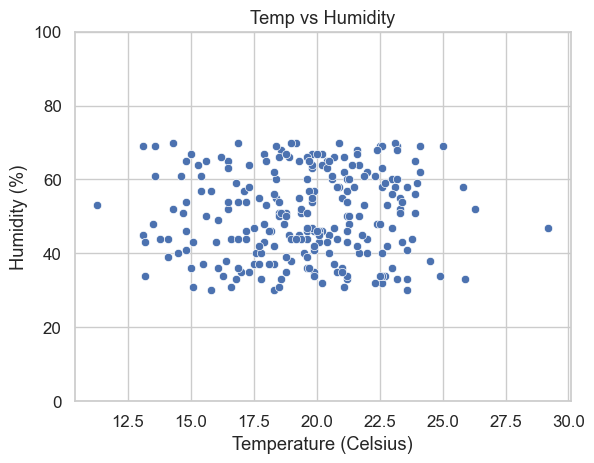

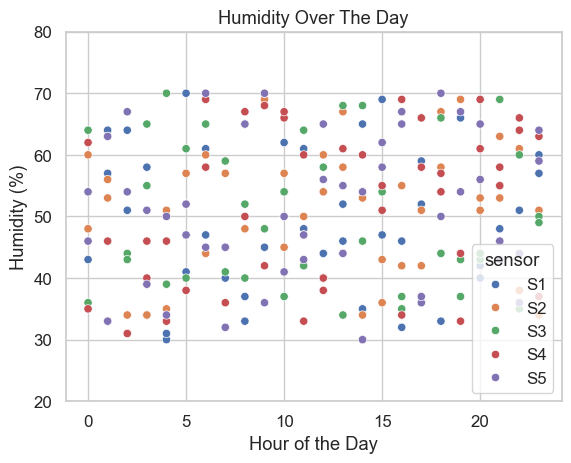

,timestamp,sensor,temp,humid,hour
0,2025-01-01 00:00:00,S1,23.4,43,0
1,2025-01-01 01:00:00,S1,21.7,64,1
2,2025-01-01 02:00:00,S1,15.3,64,2
3,2025-01-01 03:00:00,S1,16.3,34,3
4,2025-01-01 04:00:00,S1,18.3,30,4
...,...,...,...,...,...
195,2025-01-01 03:00:00,S5,19.6,39,3
196,2025-01-01 04:00:00,S5,21.3,50,4
197,2025-01-01 05:00:00,S5,26.3,52,5
198,2025-01-01 06:00:00,S5,19.2,70,6


In [72]:
# TODO: tidy the data, visualize, and answer questions
df_melted = df.melt(id_vars='timestamp', var_name='sensor', value_name='temp|humid')

df_melted = df_melted.dropna()

df_melted[['temp', 'humid']] = df_melted['temp|humid'].str.split('|', expand=True)

df_melted['temp'] = df_melted['temp'].astype(float)

df_melted['humid'] = df_melted['humid'].astype(int)

df_melted = df_melted.drop(columns='temp|humid')

df_melted['hour'] = df_melted['timestamp'].dt.hour

df_over_sixty = df_melted[df_melted['humid'] >= 60]

hour_counts = df_over_sixty['hour'].value_counts().sort_index()

most_common_hour = hour_counts.idxmax()
max_count = hour_counts.max()

print(f'Humidity is over 60% most frequently on hour {most_common_hour}:00')

sns.scatterplot(data=df_melted, x='temp', y='humid')
plt.title('Temp vs Humidity')
plt.xlabel('Temperature (Celsius)')
plt.ylim(0, 100)
plt.ylabel('Humidity (%)')
plt.show()

sns.scatterplot(data=df_melted, x='hour', y='humid', hue='sensor')
plt.title('Humidity Over The Day')
plt.xlabel('Hour of the Day')
plt.ylim(20,80)
plt.ylabel('Humidity (%)')
plt.show()

df_melted.head(200)

### Analysis

From my analysis there is no certain time where humidity spikes during the day.

The time of day humidity reaches 60% the most frequest is 6:00 am

Matter of fact, from the scatterplot of sensor data there is no correlation at all for humidity over time.

Also, there is no correlation between temperature and humidity

Finally, all the sensors show different results, please check your sensors

### Challenge 3: Developer tools preference survey

*Stakeholder*: **Product manager**  
> “We surveyed devs about their favorite tools. Can you tell if age group influences tool choice and satisfaction?”

**Key questions**
1. Which tools are most popular in the 18-24 vs 45+ brackets?
2. Does reported satisfaction differ by primary tool?

In [76]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():

    n = 200
    choices = ['Python', 'R', 'MATLAB', 'JavaScript']
    data = {
        'respondent_id': range(1,n+1),
        'age_group': np.random.choice(['18-24','25-34','35-44','45+'], n),
        'tools_used': [', '.join(np.random.choice(choices, size=np.random.randint(1,4), replace=False)) for _ in range(n)],
        'satisfaction_1-5': np.random.randint(1,6, n)
    }
    return pd.DataFrame(data)


df = _simulate()
print("Shape:", df.shape)
df.head()

Shape: (200, 4)


,respondent_id,age_group,tools_used,satisfaction_1-5
0,1,45+,"JavaScript, Python",4
1,2,45+,"JavaScript, R",1
2,3,35-44,"R, JavaScript",4
3,4,45+,"Python, MATLAB",4
4,5,45+,MATLAB,2


#### Your analysis below

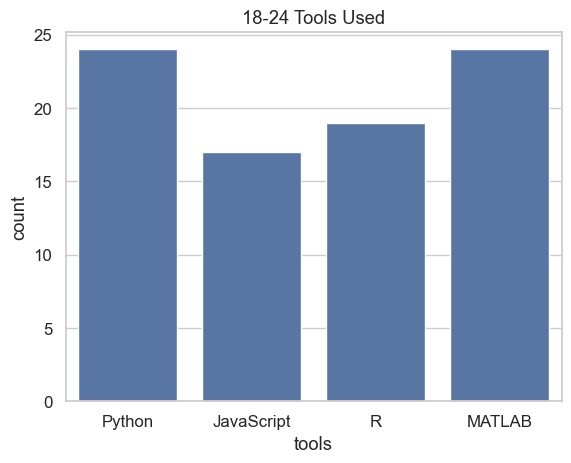

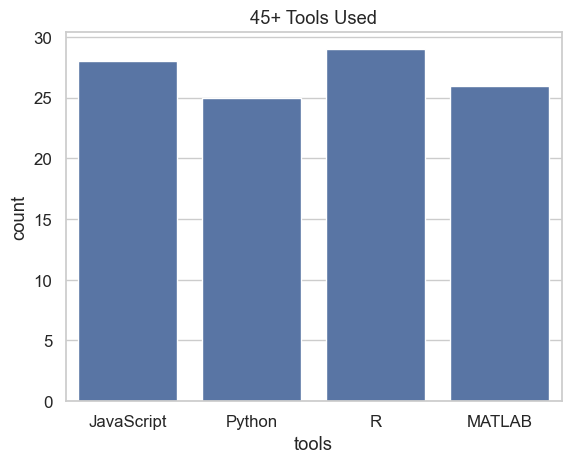

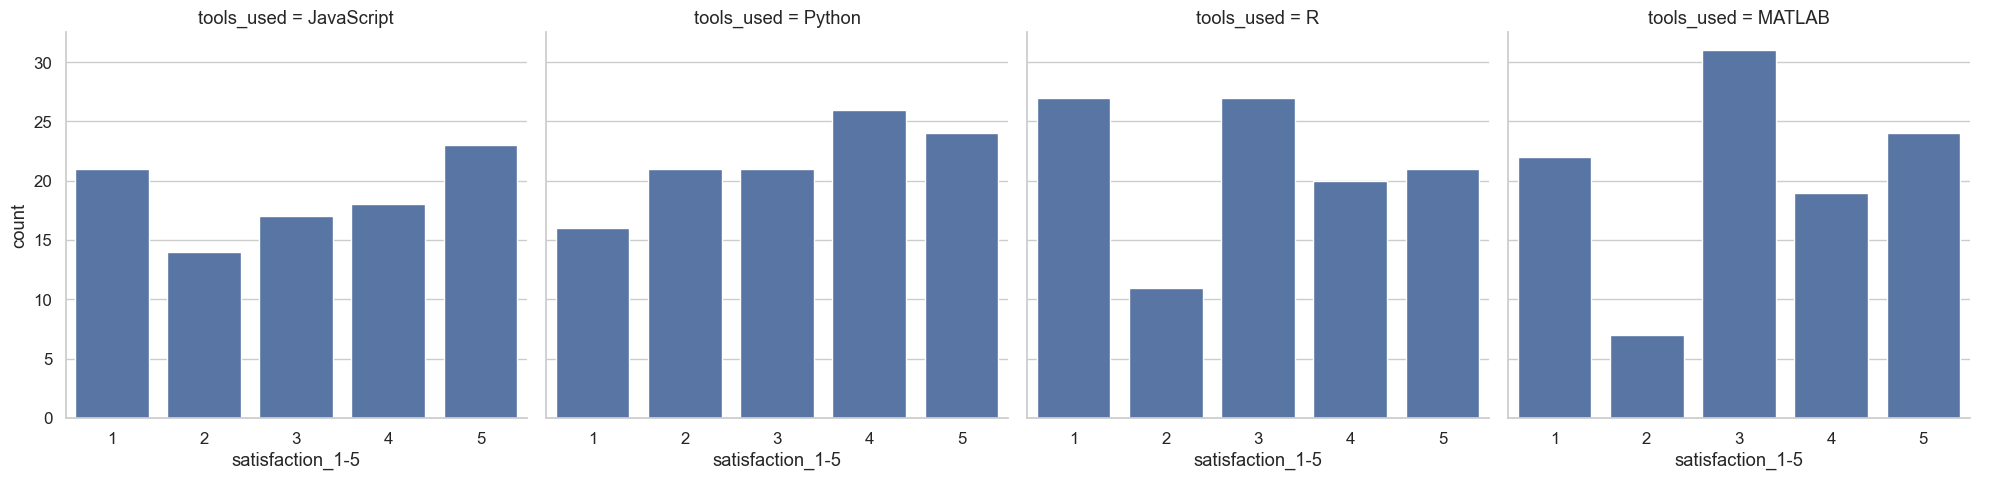

In [88]:
# TODO: tidy the data, visualize, and answer questions

df['tools_used'] = df['tools_used'].str.split(',\s*')

df = df.explode('tools_used')

df_young = df[df['age_group'] == '18-24']

sns.countplot(x='tools_used', data=df_young)
plt.title('18-24 Tools Used')
plt.xlabel('tools')
plt.ylabel('count')
plt.show()


df_young = df[df['age_group'] == '45+']

sns.countplot(x='tools_used', data=df_young)
plt.title('45+ Tools Used')
plt.xlabel('tools')
plt.ylabel('count')
plt.show()

g = sns.catplot(data=df, x='satisfaction_1-5',col='tools_used', col_wrap=4,kind='count')

### Analysis

People 18-24 tend to use more python and Matlab, while people 45+ tend to use JavaScript and R more. So, age group likely affect tools choice

Since the distribution between the satisfactory level between each tool is different, it is reasonable to assume that the tool does affect satisfactory rating. For example, more people would be disastisfied with R, while more people would be satisfied with Python

### Challenge 4: Blood pressure drug trial

*Stakeholder*: **Principal Investigator**  
> “We ran a cross-over trial with three conditions. Summarise efficacy in reducing BP and highlight best performer.”

**Key questions**
1. What is the average BP reduction (post-minus-pre) for each drug?
2. Is there significant individual variability?

In [5]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():

    subjects = [f"Subj_{i:03d}" for i in range(1,51)]
    conditions = ['placebo','drugA','drugB']
    df = pd.DataFrame({'subject': subjects})
    for c in conditions:
        df[f"bp_pre_{c}"] = np.random.normal(120,10, len(subjects))
        df[f"bp_post_{c}"] = df[f"bp_pre_{c}"] - np.random.normal(5,2, len(subjects)) + (0 if c=='placebo' else  -10 + 5*conditions.index(c))
    return df


df = _simulate()
print("Shape:", df.shape)
df.head()

Shape: (50, 7)


,subject,bp_pre_placebo,bp_post_placebo,bp_pre_drugA,bp_post_drugA,bp_pre_drugB,bp_post_drugB
0,Subj_001,130.403721,123.468981,119.325827,110.925011,138.212019,135.003711
1,Subj_002,121.858489,114.517600,108.909229,98.348348,102.829533,98.054592
2,Subj_003,115.434835,114.639314,105.805738,92.203225,141.501024,136.579044
3,Subj_004,123.952649,118.946409,91.155911,83.253758,101.942582,95.543642
4,Subj_005,117.035280,113.571603,121.101795,113.714408,121.747259,119.437004


#### Your analysis below

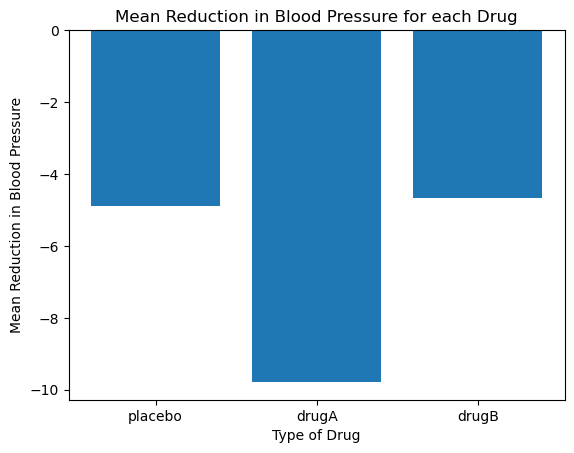

<Axes: xlabel='type', ylabel='diff'>

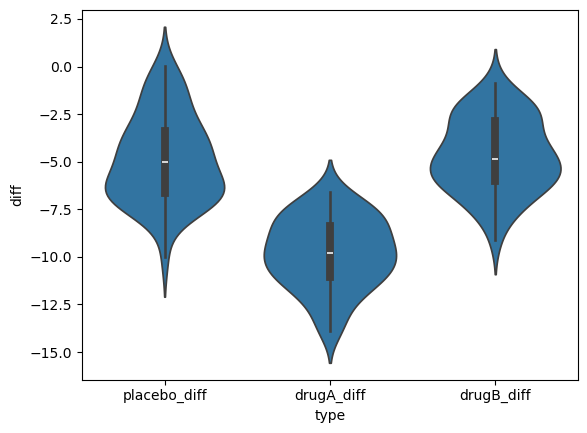

In [6]:
from mpl_toolkits.mplot3d import Axes3D

# TODO: tidy the data, visualize, and answer questions

df['placebo_diff'] = df['bp_post_placebo'] - df['bp_pre_placebo']
df['drugA_diff'] = df['bp_post_drugA'] - df['bp_pre_drugA']
df['drugB_diff'] = df['bp_post_drugB'] - df['bp_pre_drugB']

means = np.array([df['placebo_diff'].mean(), df['drugA_diff'].mean(), df['drugB_diff'].mean()])
types = np.array(['placebo', 'drugA', 'drugB'])

plt.bar(types, means)
plt.title('Mean Reduction in Blood Pressure for each Drug')
plt.xlabel('Type of Drug')
plt.ylabel('Mean Reduction in Blood Pressure')
plt.show()

df.head()

df.drop('bp_post_placebo', axis=1, inplace=True)
df.drop('bp_pre_placebo', axis=1, inplace=True)
df.drop('bp_post_drugA', axis=1, inplace=True)
df.drop('bp_pre_drugA', axis=1, inplace=True)
df.drop('bp_post_drugB', axis=1, inplace=True)
df.drop('bp_pre_drugB', axis=1, inplace=True)

df_melted = df.melt(id_vars='subject', var_name='type', value_name='diff')

sns.violinplot(data=df_melted, x='type', y='diff')

### Analysis:

Drug A seems to have the lowest mean difference in blood pressure among the three test subjects

There does not seem to be huge individual variability among the three drugs

### Challenge 5: Social media campaign analytics

*Stakeholder*: **Marketing lead**  
> “Our views are recorded as strings like ‘1.2k’. Clean this up and evaluate platform performance.”

**Key questions**
1. Which platform achieved the highest median daily *views* and *like rate*?
2. Are weekends different from weekdays?

In [139]:
# --- Generate the messy data (RUN THIS) ---
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

def _simulate():

    dates = pd.date_range('2024-07-01', '2024-12-31', freq='D')
    platforms = ['TikTok','Instagram','YouTube']
    rows = []
    for d in dates:
        for p in platforms:
            views = np.random.randint(1000, 100000)
            likes = int(views * np.random.uniform(0.05, 0.2))
            rows.append({'date': d, 'platform': p, 'views': f"{views/1000:.1f}k", 'likes': likes if np.random.rand()>0.05 else np.nan})
    df = pd.DataFrame(rows)
    dup = df.sample(200)
    df = pd.concat([df, dup], ignore_index=True).reset_index(drop=True)
    return df


df = _simulate()
print("Shape:", df.shape)
df.head()

Shape: (752, 4)


,date,platform,views,likes
0,2024-07-01,TikTok,10.0k,1612.0
1,2024-07-01,Instagram,39.6k,3683.0
2,2024-07-01,YouTube,7.2k,NaN
3,2024-07-02,TikTok,6.5k,991.0
4,2024-07-02,Instagram,27.2k,3511.0


#### Your analysis below

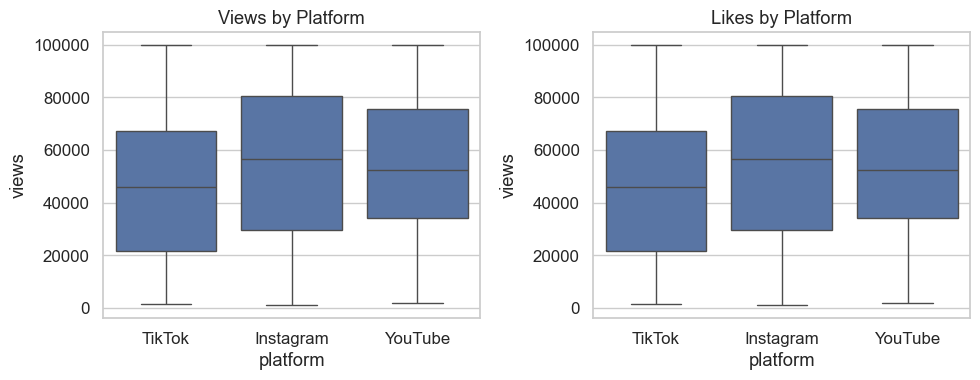

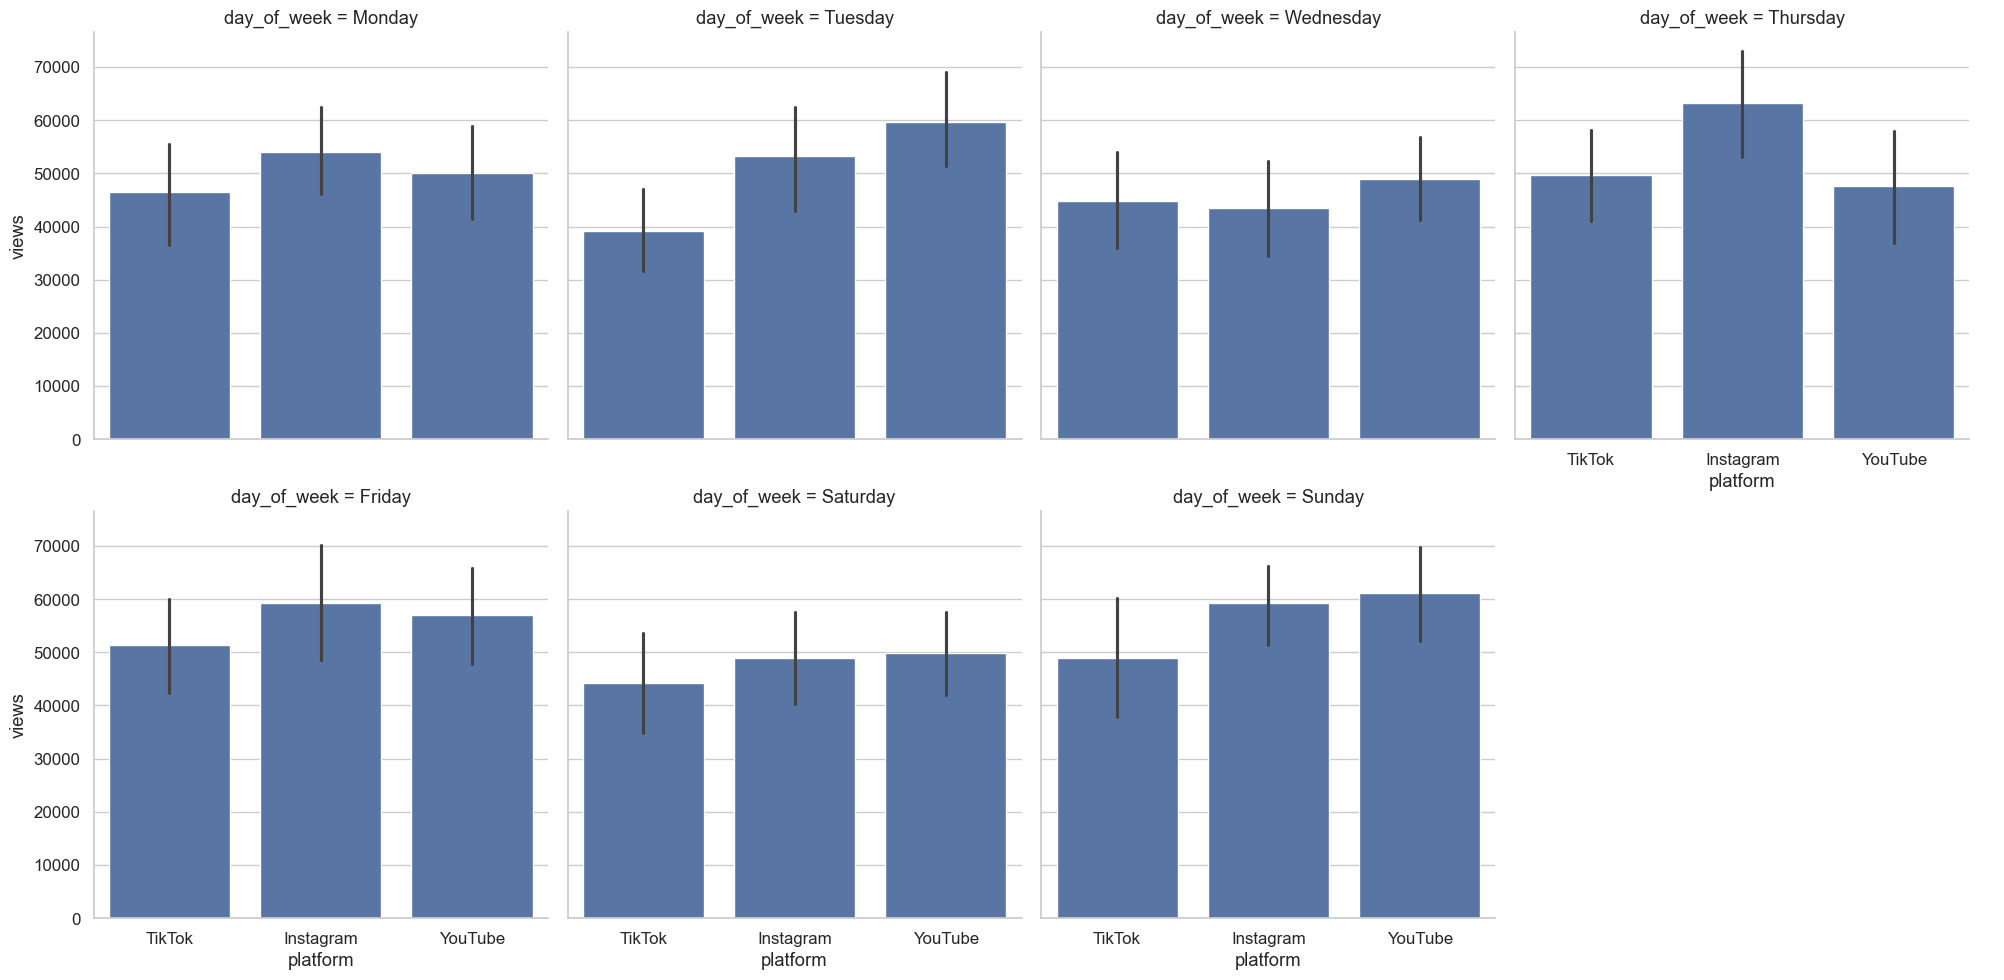

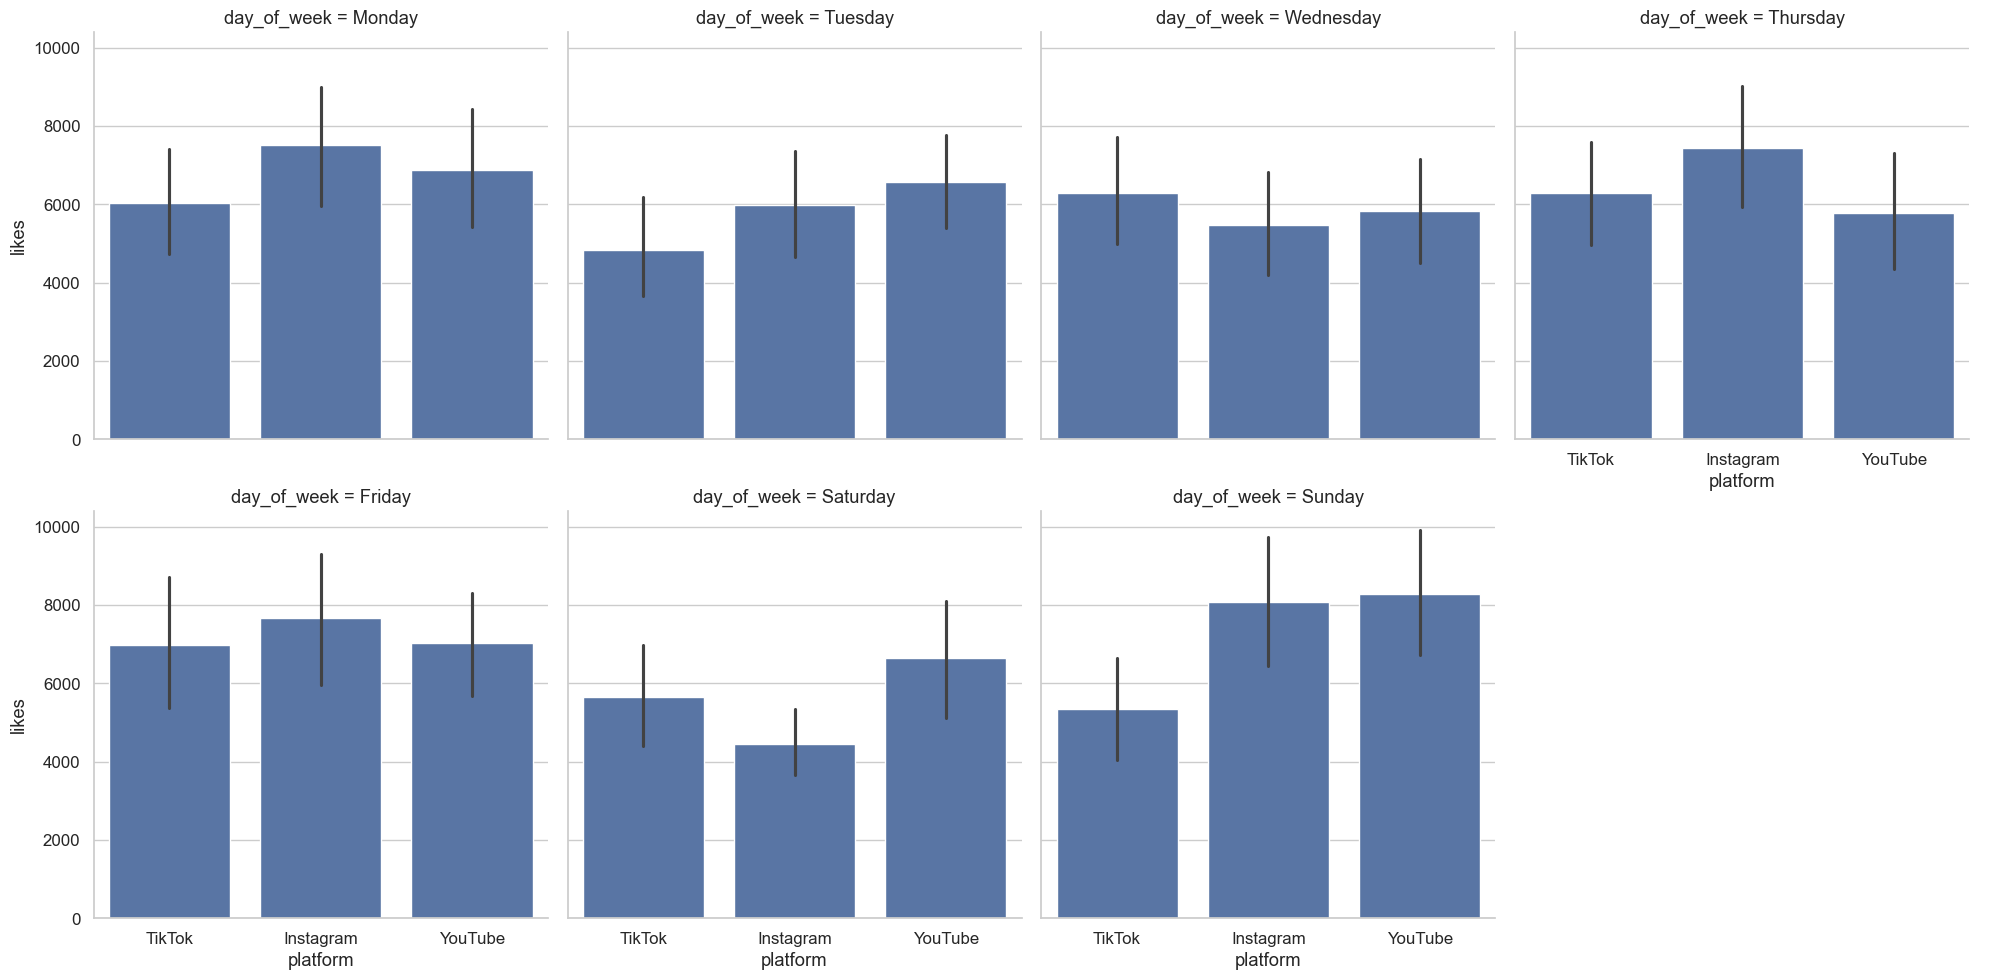

In [140]:
def convert_shorthand(value):
    value = value.strip().lower()
    if value.endswith('k'):
        return float(value[:-1]) * 1_000
    elif value.endswith('m'):
        return float(value[:-1]) * 1_000_000
    else:
        return float(value)


df['views'] = df['views'].apply(convert_shorthand)

fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.boxplot(data=df, x='platform', y='views', ax=ax[0])
ax[0].set_title('Views by Platform')
sns.boxplot(data=df, x='platform', y='views', ax=ax[1])
ax[1].set_title('Likes by Platform')
plt.tight_layout()
plt.show()

df['date'] = pd.to_datetime(df['date'])

df['day_of_week'] = df['date'].dt.strftime('%A')

sns.catplot(data=df, x='platform', y='views',
                col='day_of_week', col_wrap=4,
                kind='bar')
sns.catplot(data=df, x='platform', y='likes',
                col='day_of_week', col_wrap=4,
                kind='bar')


### Analysis

YouTube had the most likes and views accross the timeframe among the platforms.

The distributions of likes and views accross all platforms seems to be different between the days of the week